<a href="https://colab.research.google.com/github/mi622/EDP/blob/main/penalizaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Biblioteca
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# f y restricciones
def f(x1, x2): return (x1-6)**2 + (x2-7)**2
def g1(x1, x2): return -3*x1 - 2*x2 + 6
def g2(x1, x2): return -x1 + x2 - 3
def g3(x1, x2): return x1 + x2 - 7
def g4(x1, x2): return (2/3)*x1 - x2 - (4/3)


In [3]:
# penalización cuadrática
def Q(x1, x2, alpha=10.0):
    pen = (np.maximum(0, g1(x1,x2))**2 +
           np.maximum(0, g2(x1,x2))**2 +
           np.maximum(0, g3(x1,x2))**2 +
           np.maximum(0, g4(x1,x2))**2)
    return f(x1,x2) + alpha*pen

In [4]:
alpha = 10.0

# vértices de la región factible (en orden)
poly = np.array([[2,0],[5,2],[2,5],[0,3]])
poly_closed = np.vstack([poly, poly[0]])


In [5]:
# malla para contornos
xs = np.linspace(-1, 8, 600)
ys = np.linspace(-1, 8, 600)
X, Y = np.meshgrid(xs, ys)


In [6]:
# máscara de factibilidad para sombrear
feasible = ((g1(X,Y) <= 0) & (g2(X,Y) <= 0) & (g3(X,Y) <= 0) & (g4(X,Y) <= 0))


In [7]:
# valores en malla
F = f(X,Y)
QV = Q(X,Y,alpha=alpha)

In [8]:
# puntos clave
x_uncon = (6,7)
x_star  = (3,4)

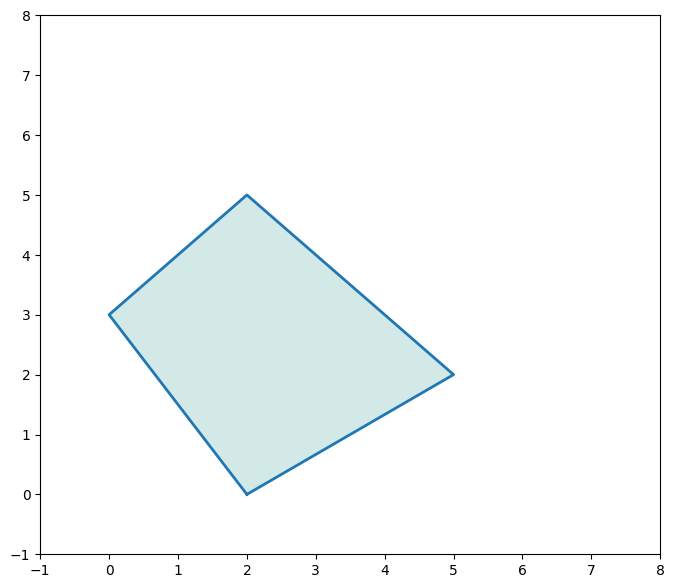

In [9]:

# gráfico
plt.figure(figsize=(8,7))
plt.contourf(X, Y, feasible.astype(float), levels=[0.5, 1.5], alpha=0.2)
plt.plot(poly_closed[:,0], poly_closed[:,1], linewidth=2, label="Región factible")



<a list of 6 text.Text objects>

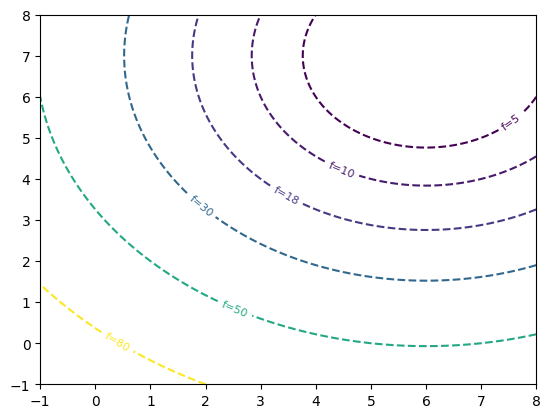

In [10]:
# contornos de f (punteados)
levels_f = [5, 10, 18, 30, 50, 80]
c1 = plt.contour(X, Y, F, levels=levels_f, linestyles="--")
plt.clabel(c1, inline=True, fontsize=8, fmt="f=%.0f")


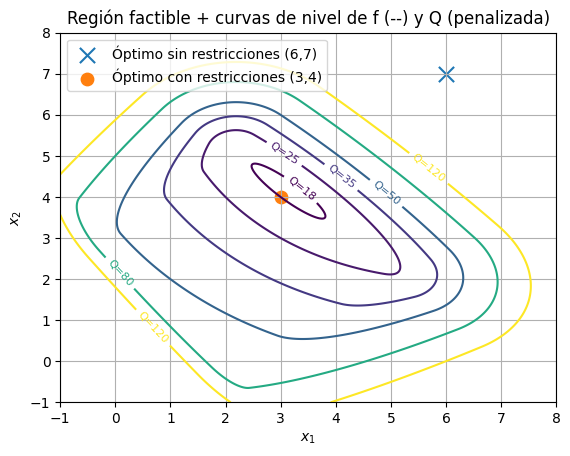

In [11]:

# contornos de Q (sólidos)
levels_Q = [18, 25, 35, 50, 80, 120]
c2 = plt.contour(X, Y, QV, levels=levels_Q)
plt.clabel(c2, inline=True, fontsize=8, fmt="Q=%.0f")

plt.scatter([x_uncon[0]],[x_uncon[1]], marker="x", s=120, label="Óptimo sin restricciones (6,7)")
plt.scatter([x_star[0]],[x_star[1]], marker="o", s=80, label="Óptimo con restricciones (3,4)")

plt.xlim(-1, 8); plt.ylim(-1, 8)
plt.xlabel("$x_1$"); plt.ylabel("$x_2$")
plt.title("Región factible + curvas de nivel de f (--) y Q (penalizada)")
plt.grid(True); plt.legend()
plt.show()